In [1]:
#Initally importing ALL potential libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score #plot_confusion_matrix

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv('../data/student_enrolled_demographics.csv')

In [4]:
df

,Unnamed: 0,Camper ID,Age,2021 > Grade,Gender,School,Years at camp,Sibling count,Lead source,Primary family city,...,2021 > Unenrollment date,2021 > Is your child attending with a friend?,2021 ^Student Eval,2021 ^Expectations,2021 ^Trip Length,2021 ^^Interested in Another Trip?,2021 ^^^Future Trip?,2021 ^^^^Leader Rating of Student,2022 > Status,"2022 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)"
0,1,9522,19,11th,Male,Memphis University School,1,0,Friend,Memphis,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Off the Charts (Highest),Cancelled,NaN
1,2,9542,15,8th,Male,Charlotte Country Day School,2,1,Friend,Charlotte,...,NaN,Yes,5,Met expectations,Too Short,Yes,NaN,3,Enrolled,DOL 1B
2,3,3606,17,10th,Female,Collegiate School,2,0,Friend,Richmond,...,NaN,Yes,5,Exceeded expectations,Just Right,Yes,"HWI, THA, FIJ",4,Alumni,NaN
3,4,5791,19,12th,Male,Charlotte Latin School,2,0,Word of Mouth,Charlotte,...,NaN,No,5,Met expectations,Just Right,No,NaN,5,Alumni,NaN
4,5,6847,18,11th,Female,Academy of Richmond County,1,1,Friend,Augusta,...,NaN,Yes,5,Met expectations,Just Right,Not Sure,"THA, KEZ",Off the Charts (Highest),Alumni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,1728,8481,15,8th,Female,Battle Ground Academy,3,0,Friend,Franklin,...,11-03-2021,No,5,Exceeded expectations,Just Right,Yes,FIJ,Off the Charts (Highest),Enrolled,BCR 2A
1728,1729,6484,18,10th,Female,Providence Day School,2,0,Friend,Charlotte,...,NaN,No,5,Exceeded expectations,Just Right,Yes,KIL,3,Waitlist Only,NaN
1729,1730,8723,16,8th,Female,Charlotte Country Day School,2,0,Friend,Charlotte,...,NaN,Yes,5,Met expectations,Just Right,Not Sure,NaN,5,Enrolled,CRO 2B
1730,1731,9403,18,10th,Female,Marin Academy,1,0,Friend,Belvedere Tiburon,...,NaN,No,5,Met expectations,Just Right,Not Sure,KEZ,4,Alumni,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unnamed: 0                                                      1732 non-null   int64  
 1   Camper ID                                                       1732 non-null   int64  
 2   Age                                                             1732 non-null   int64  
 3   2021 > Grade                                                    1732 non-null   object 
 4   Gender                                                          1732 non-null   object 
 5   School                                                          1732 non-null   object 
 6   Years at camp                                                   1732 non-null   int64  
 7   Sibling count                                      

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.isna().sum()

Camper ID                                                            0
Age                                                                  0
2021 > Grade                                                         0
Gender                                                               0
School                                                               0
Years at camp                                                        0
Sibling count                                                        0
Lead source                                                          3
Primary family city                                                  0
Primary family state                                                 2
Primary family country                                            1523
Primary family zip                                                   0
Do you have a copy of this year’s catalog?                        1668
2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)       1
2021 >

#### Notes on ALL Columns:
- Camper ID: Unique student identifier (eliminates the names of all students), allows us to align camper information across multiple enrollment years.
- Age: student's current age - NOT the age when they were enrolled, this will need to be engineered to be accurate (subtract a year or two or this will be dropped as this information is captured in the "Current grade" column.
- Current grade: student's grade the year being analyzed - could this become a numeric column?
- Gender: [OneHotEncode] binary column with values that actually represent the student's sex
- School: [likely to DROP later?] this column contains the name of the student's school, this information is relatively granular and may not be very impactful as a feature.
- Years at camp: if the value is 1, then this is the student's first year traveling with Moondance, and so on up to 6 meaning this is the student's 6th summer!
- Sibling count: [DROP] This count represents the reported number of siblings a student has, whether the sib. is affiliated with Moondance or not. This count does not represent the same information as the '2021 > Enrolled sibling count' and it is likely going to be dropped. 
- Lead source:[Fill Nulls] Contains information about how a student was introduced to Moondance with various options such as 'Friend' or 'Website'. Fill the 3 nulls with 'No Source'.
- Primary family city: Details the city where the student/family lives. MAY be able to use this later for project goal #3, or would have to be OneHotEncoded out for continued analysis in the first stage of the project.
- Primary family country: [Fill Nulls] Details the student's country where they currently reside. Impute all the nulls to be 'United States'. This will not be helpful for stage 1 analysis, but may be used later in stages 2 or 3.
- Primary family state: [MANUAL CLEAN] Details the students home state. One of the students is from Atlanta, meaning they are likely from Georgia, the other is an international student who doesn't have a state. Maybe make an "INTL" state option. ULTIMATELY - these were dropped, however this may need to change later!
- Primary family zip: To be used for project goal #3
- Do you have a copy of this year’s catalog?: [DROP] Initally suspected this column would show how well distributed the marketing materials (specifically the catalog) are spread/whether or not there appears to be a correlation between enrollment and catalog possession. There are too many null values for this to be a useful feature.
- trip code & - trip + section name (all): [DROP - 'test' student, as null] Details the trip code and section the student was assigned/attened. There appears to be a 'test' student included in the data. Both of these columns contain the same information (the name of the trip), so 1 will need to be dropped if this information is to be used. 
- Enrolled sibling count [Fill nulls with zeros]: Details if a student has a family member also traveling with Moondance this summer. 
- 2021 > Status: [DROP] ALL should be 'Enrolled'
- Unenrollment date: [CLEAN] If the student changed trips there will be a value in this column. Can be mapped to be a boolean value rather than the date.
- 2021 > First enrollment request date: contains the first date the student attempted to enroll. This does not indicate whther or not the student was actually placed on a trip this day. IT MAY BE INTERESTING to engineer a feature that measures the number of days between first enrollment request/attempt and actual enrollment day to see if there's a correlation between the length of time it took for the child to get on a trip and their likelihood to try and come back                                 
- 2021 > Is your child attending with a friend?: [CLEAN] A Yes/No question that details whether or not a child will be travelling with a peer. To be cast as boolean values!                   
- ^Student Eval: [CLEAN - the "Off the Charts" distinction should be a '6'] This column details the rating the students gave their trip 1 - 6 ("Off the Charts"). 110 values appear to be missing. May need to impute these by filling in the average OR 'Missing Info'.
- ^Expectations: This feature contains values such as 'Met expectations', 'Exceeded expectations' and 'Did not meet expectations'. May be treated as an ordinal value to be encoded? Could cast these values as numbers also, for ease of working (1, 2, 3)
- ^Trip Length: Similar to the '^Expectations' feature, this column contains values 'Too Short', 'Just Right', 'Too Long'. May be treated as an ordinal value to be encoded? Could cast these values as numbers also, for ease of working (1, 2, 3)
- ^^Interested in Another Trip?: Options = 'Yes', 'Not Sure', 'No'
- ^^^Future Trip? Details the trip options that the student may be interested in for future summers!
- ^^^^Leader Rating of Student: [CLEAN - the "Off the Charts" distinction should be a '6'] Details the score the leader team provided regarding the student's behavior on the trip/their overall ability to meet trip expectations.
- 2022 > Status: This column is the 'target' as it details whether or not a student enrolled the following summer, which would indicate a positive (1) or negative (0) result.
- 2022 > trip code: This column details the actual trip the student enrolled in for the following season. Could be an interesting exploration to see if they ACTUALLY went on one of the trips that they listed that they may be interested in attending. Is a stretch, but could be used later in goals #2 or #3, so it will remain in the dataset even if it is initally dropped for goal #1.

#### Column by Column Description/Actions

>#### Camper ID: 
> - Unique student identifier (eliminates the names of all students), allows us to align camper information across multiple enrollment years.


In [8]:
df.drop('Camper ID', axis=1, inplace=True)

>#### Age: 
> - Student's current age - NOT the age when they were enrolled, this will need to be engineered to be accurate (subtract a year or two or this will be dropped as this information is captured in the "Current grade" column.

In [9]:
# No student should be over 18, clearly this is the current age of the student and NOT the age they were when they 
## travelled with the company. Drop this.
df['Age'].value_counts()

17    431
16    394
18    307
15    283
19    123
14    117
13     55
20     20
3       1
2       1
Name: Age, dtype: int64

In [10]:
df.drop('Age', axis=1, inplace=True)

>#### 2021 > Grade: 
> - Student's grade the year being analyzed - could this become a numeric column by splitting off the grade value?

In [11]:
df['2021 > Grade'].value_counts()

9th     424
10th    421
8th     324
11th    270
7th     154
12th     78
6th      61
Name: 2021 > Grade, dtype: int64

>#### Gender: 
> - [OneHotEncode] binary column with values that actually represent the student's sex
> - appears to be about 57% females to 43% males enrolled this year. 


In [12]:
df['Gender'].value_counts()

Female    984
Male      748
Name: Gender, dtype: int64

In [13]:
df['Gender'].value_counts(normalize=True)

Female    0.568129
Male      0.431871
Name: Gender, dtype: float64

>#### School: 
> - This column contains the name of the student's school, this information is relatively granular and may not be very impactful as a feature.
> - With 551 values, this feature would not likely offer significant insight if added to a model
> - This column will be dropped.

In [14]:
df['School'].nunique()

551

>#### Years at camp: 
> - If the value is 1, then this is the student's first year traveling with teh company, and so on up to 6 meaning this is the student's 6th summer!
> - This is a numeric column, and will be treated as such for initial analysis.

In [15]:
df['Years at camp'].value_counts()

2    597
1    494
3    445
4    165
5     25
6      6
Name: Years at camp, dtype: int64

>#### Sibling count: 
> - This count represents the reported number of siblings a student has, whether the sib. is affiliated with Moondance or not. 
> - This count does not represent the same information as the '2021 > Enrolled sibling count' and it is likely going to be dropped. 
> - Drop this column.


In [16]:
df.drop('Sibling count', axis=1, inplace=True)

>#### Lead source:
> - Contains information about how a student was introduced to Moondance with various options such as 'Friend' or 'Website'. 
> - Fill the 3 nulls with 'No Source'.


In [17]:
# OneHotEncode this out?
df['Lead source'].value_counts()

Friend                                 1134
Family                                  180
Word of Mouth                           150
I'm a Moondance Alumni                  116
I'm a sibling of a Moondance Alumni      49
Web Search                               31
Social Media                             19
Competitor                               10
Advertisement                            10
Catalog                                   9
Home Presentation                         9
School Auction                            3
Website                                   3
Google Ad                                 2
Camp Advisory Service                     2
Summer Opportunities Fair                 1
Teacher                                   1
Name: Lead source, dtype: int64

In [18]:
# Taking a look at the records with nulls:
df.loc[df['Lead source'].isnull() == True]

,2021 > Grade,Gender,School,Years at camp,Lead source,Primary family city,Primary family state,Primary family country,Primary family zip,Do you have a copy of this year’s catalog?,...,2021 > Unenrollment date,2021 > Is your child attending with a friend?,2021 ^Student Eval,2021 ^Expectations,2021 ^Trip Length,2021 ^^Interested in Another Trip?,2021 ^^^Future Trip?,2021 ^^^^Leader Rating of Student,2022 > Status,"2022 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)"
222,9th,Male,St. Davids School,1,NaN,Raleigh,NC,NaN,27607,NaN,...,NaN,Yes,5,Met expectations,Just Right,Yes,ICE,NaN,Alumni,NaN
485,9th,Male,Berkeley Preparatory School,2,NaN,Tampa,FL,NaN,33629,NaN,...,NaN,No,5,Met expectations,Just Right,Yes,FIJ,4,Enrolled,CHA 2B
1502,8th,Male,Virginia Episcopal School (VES),3,NaN,Greensboro,NC,NaN,27408,NaN,...,NaN,Yes,5,Exceeded expectations,Just Right,Yes,FIJ,Off the Charts (Highest),Alumni,NaN


In [19]:
# Filling null values:
df['Lead source'] = df['Lead source'].fillna("No Source")

In [20]:
# Checking that the 3 null values were appropriately filled:
df['Lead source'].value_counts()

Friend                                 1134
Family                                  180
Word of Mouth                           150
I'm a Moondance Alumni                  116
I'm a sibling of a Moondance Alumni      49
Web Search                               31
Social Media                             19
Competitor                               10
Advertisement                            10
Catalog                                   9
Home Presentation                         9
School Auction                            3
No Source                                 3
Website                                   3
Google Ad                                 2
Camp Advisory Service                     2
Summer Opportunities Fair                 1
Teacher                                   1
Name: Lead source, dtype: int64

>#### Primary family city: 
> - Details the city where the student/family lives. 
> - May be able to use this later for project goal #3, or would have to be OneHotEncoded out for continued analysis in the first stage of the project.
> - With 308 values, this is will be a difficult feature to gain significant insight from in modeling.

In [21]:
df['Primary family city'].nunique()

308

>#### Primary family country: 
> - Details the student's country where they currently reside. 
> - Fill all the nulls with 'United States', as this is the most frequent AND accurate value to replace here. 
> - This will not be helpful for stage 1 analysis, but may be used later in stages 2 or 3.
> - Likely to drop this column, as so many students are from the US. 

In [22]:
df['Primary family country'].value_counts()

United States               202
United Kingdom                3
Canada                        2
Northern Mariana Islands      1
INTL                          1
Name: Primary family country, dtype: int64

In [23]:
# Filling nulls:
df['Primary family country'] = df['Primary family country'].fillna('United States')

In [24]:
# Checking the nulls were properly filled:
df['Primary family country'].value_counts()

United States               1725
United Kingdom                 3
Canada                         2
Northern Mariana Islands       1
INTL                           1
Name: Primary family country, dtype: int64

>#### Primary family state: 
> - [MANUAL CLEAN] Details the students home state. 
> - One of the students with a null value in this column is from Atlanta, meaning they are likely from Georgia, the other is an international student who doesn't have a state. 
> - Maybe make an "INTL" state option. 
> - ULTIMATELY - these were dropped, however this may need to change later!

In [25]:
# Add Georgia? And leave the student from Singapore as an INTL student
df.loc[df['Primary family state'].isnull() == True, 
       ['Primary family zip', 'Primary family city', 'Primary family country']]

,Primary family zip,Primary family city,Primary family country
483,30342,Atlanta,United States
998,238309,Singapore,INTL


>#### Primary family zip: 
> - To be used for project goal #3
> - Too many unique values to gain insight from in initial modeling.
> - To be dropped before initial modeling begins.

In [26]:
df['Primary family zip'].nunique()

478

>#### Do you have a copy of this year’s catalog?: 
> - Initally suspected this column would show how well distributed the marketing materials (specifically the catalog) are spread/whether or not there appears to be a correlation between enrollment and catalog possession. 
> - There are too many null values for this to be a useful feature, and no way to know how to properly fill in the nulls.
> - This can be dropped altogether.

In [27]:
# With the majority of this question being left blank anyhow, it's not helpful to include this feature.
df['Do you have a copy of this year’s catalog?'].value_counts()

No     38
Yes    26
Name: Do you have a copy of this year’s catalog?, dtype: int64

In [28]:
# Analyzing the 'Lead source' column to attempt to gain more insight about this column, to no avail.
df.loc[df['Do you have a copy of this year’s catalog?'].isnull() == False, 'Lead source']

15      I'm a Moondance Alumni
17      I'm a Moondance Alumni
22      I'm a Moondance Alumni
66      I'm a Moondance Alumni
71                      Friend
                 ...          
1602    I'm a Moondance Alumni
1609    I'm a Moondance Alumni
1626    I'm a Moondance Alumni
1653    I'm a Moondance Alumni
1654    I'm a Moondance Alumni
Name: Lead source, Length: 64, dtype: object

In [29]:
df.drop('Do you have a copy of this year’s catalog?', axis=1, inplace=True)

>#### trip code & - trip + section name (all): 
> - Details the trip code and section the student was assigned/attened. For instance the California 1 trip is coded as CAL 1 in the trip code column.
> - There appears to be a 'test' student included in the data. 
> - Both of these columns contain the same information (the name of the trip), so 1 will need to be dropped if this information is to be used. 

In [30]:
# This appears to be a 'test' student and will need to be dropped.
df.loc[df['2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)'].isnull() == True]

,2021 > Grade,Gender,School,Years at camp,Lead source,Primary family city,Primary family state,Primary family country,Primary family zip,"2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)",...,2021 > Unenrollment date,2021 > Is your child attending with a friend?,2021 ^Student Eval,2021 ^Expectations,2021 ^Trip Length,2021 ^^Interested in Another Trip?,2021 ^^^Future Trip?,2021 ^^^^Leader Rating of Student,2022 > Status,"2022 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)"
1525,9th,Male,test,4,Catalog,Athens,GA,United States,30606-4133,NaN,...,"01-27-2022, 03-02-2022, 05-08-2022",Yes,NaN,NaN,NaN,NaN,NaN,NaN,Enrolled,NaN


In [31]:
# Pulling the index value from the test student
test_drop = df.loc[df['2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)'].isnull() == True].index

In [32]:
# Dropping the test student via index
df.drop(test_drop, inplace=True)

In [33]:
# Checking that the test student was properly dropped
df.isna().sum()

2021 > Grade                                                         0
Gender                                                               0
School                                                               0
Years at camp                                                        0
Lead source                                                          0
Primary family city                                                  0
Primary family state                                                 2
Primary family country                                               0
Primary family zip                                                   0
2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)       0
2021 > trip + section names (all)                                    0
2021 > Enrolled sibling count                                     1302
2021 > Status                                                        0
2021 > First enrollment request date                                 0
2021 >

In [34]:
df.drop('2021 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)', axis=1, inplace=True)

>#### Enrolled sibling count:
> - Details if a student has a family member also traveling with Moondance this summer.
> - Fill nulls with zeros!
> - Treat this column as a numeric variable.

In [35]:
df['2021 > Enrolled sibling count'].value_counts()

1.0    384
2.0     45
Name: 2021 > Enrolled sibling count, dtype: int64

In [36]:
# Filling nulls with zero to indicate that no sibling was enrolled that season.
df['2021 > Enrolled sibling count'] = df['2021 > Enrolled sibling count'].fillna(0)

In [37]:
# Checking that all nulls were filled:
df['2021 > Enrolled sibling count'].value_counts()

0.0    1302
1.0     384
2.0      45
Name: 2021 > Enrolled sibling count, dtype: int64

In [38]:
# Analyzing the percentage of students travelling with or without siblings:
df['2021 > Enrolled sibling count'].value_counts(normalize=True)

0.0    0.752166
1.0    0.221837
2.0    0.025997
Name: 2021 > Enrolled sibling count, dtype: float64

>#### 2021 > Status: 
> - Dropping this column as it appears ALL students are listed as "Enrolled"

In [39]:
df['2021 > Status'].value_counts()

Enrolled    1731
Name: 2021 > Status, dtype: int64

In [40]:
# Dropping the column from the dataframe
df.drop('2021 > Status', axis=1, inplace=True)

>#### 2021 > First enrollment request date: 
> - Contains the first date the student attempted to enroll. This does not indicate whther or not the student was actually placed on a trip this day. 
> - IT MAY BE INTERESTING to engineer a feature that measures the number of days between first enrollment request/attempt and actual enrollment day to see if there's a correlation between the length of time it took for the child to get on a trip and their likelihood to try and come back                                 
> - For initial modeling, this column will be dropped.

In [41]:
df.drop('2021 > First enrollment request date', axis=1, inplace=True)

>#### 2021 > First enrollment date:
> - See comments above, for the potential engineering of an additional column that could detail how long it took for a child to be enrolled after their first attempt to sign up for a trip.

In [42]:
df.drop('2021 > First enrollment date', axis=1, inplace=True)

>#### Unenrollment date --> Changed Trip: 
> - If the student changed trips there will be a date value in this column denoting when that child changed trips. 
> - Can be mapped to be a boolean value rather than the date.
> - Will create a new column called "Changed Trip" to indicate if a student changed trips (1) or not (0).

In [43]:
# Checking the records for students that have dates in the column. Some even have multiple dates, but all this means 
## is the student was switched from one trip to another on the date listed.
df.loc[df['2021 > Unenrollment date'].isnull() == False]

,2021 > Grade,Gender,School,Years at camp,Lead source,Primary family city,Primary family state,Primary family country,Primary family zip,2021 > trip + section names (all),...,2021 > Unenrollment date,2021 > Is your child attending with a friend?,2021 ^Student Eval,2021 ^Expectations,2021 ^Trip Length,2021 ^^Interested in Another Trip?,2021 ^^^Future Trip?,2021 ^^^^Leader Rating of Student,2022 > Status,"2022 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)"
6,11th,Female,North Atlanta High School,1,Friend,Atlanta,GA,United States,30305,Kilimanjaro 3,...,05-11-2022,No,5,Exceeded expectations,Just Right,Not Sure,THA; CHA; KEZ; MYS,5,Alumni,NaN
14,8th,Female,Park City High School,3,Word of Mouth,Park City,UT,United States,84060,Iceland 3,...,11-08-2021,No,5,Met expectations,Just Right,Yes,"SAF, FIJ",5,Enrolled,SAF 2B
19,9th,Male,Summit High School,1,Friend,Bend,OR,United States,97702,FIJ 3,...,"05-03-2022, 07-11-2022",No,Off the Charts (Highest),Exceeded expectations,Just Right,Yes,NaN,5,Alumni,NaN
29,11th,Male,St Andrews Episcopal,3,Friend,Austin,TX,United States,78735-1470,Kenya + Zanzibar 1,...,10-12-2021,No,5,Met expectations,Just Right,Yes,"KIL, THA, MYS",5,Alumni,NaN
31,12th,Female,Academy of Richmond County,4,Friend,Augusta,GA,United States,30909,Mystery Trip 1,...,08-31-2021,No,Off the Charts (Highest),Exceeded expectations,Just Right,No,NaN,Off the Charts (Highest),Alumni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,8th,Female,Athens Academy,3,Word of Mouth,Athens,GA,United States,30606,Iceland 1,...,01-20-2022,No,5,Exceeded expectations,Just Right,Yes,SERVICE,Off the Charts (Highest),Enrolled,SPM 1B
1710,9th,Male,Charlottesville Day School,2,Friend,Charlottesville,VA,United States,22903,FIJ 3,...,03-11-2022,Yes,Off the Charts (Highest),Met expectations,Just Right,Not Sure,HWI,5,Alumni,NaN
1719,10th,Female,The Westminster Schools,2,Friend,Atlanta,GA,United States,30305,Northern Lights 1,...,11-16-2021,No,5,Exceeded expectations,Just Right,Not Sure,NOR,5,Enrolled,CHA 4B
1721,9th,Female,RJ Reynolds High School,2,Friend,Winston-Salem,NC,United States,27106,Spain + Morocco 1,...,11-19-2021,Yes,Off the Charts (Highest),Exceeded expectations,Just Right,Yes,"THA, FIJ, CHA",4,Enrolled,KEZ 1B


In [44]:
# Filling nulls with "No Change"
df['2021 > Unenrollment date'] = df['2021 > Unenrollment date'].fillna('No Change')

In [45]:
# Creating a new column with boolean variables to hold the original columns value:
df['Changed Trip'] = df['2021 > Unenrollment date'].map(lambda x: 0 if x == 'No Change' else 1)

In [46]:
# Analyzing the percent of students that changed trips
df['Changed Trip'].value_counts(normalize=True)

0    0.86944
1    0.13056
Name: Changed Trip, dtype: float64

In [47]:
df.drop('2021 > Unenrollment date', axis=1, inplace=True)

>#### 2021 > Is your child attending with a friend?: 
> - A Yes/No question that details whether or not a child will be travelling with a peer. 
> - To be OneHotEncoded later.                  

In [48]:
df['2021 > Is your child attending with a friend?'].value_counts()

No     1049
Yes     682
Name: 2021 > Is your child attending with a friend?, dtype: int64

>#### ^Student Eval --> 'rating': 
> - This column details the rating the students gave their trip 1 - 6 ("Off the Charts"). 
> - 110 values appear to be missing. May need to impute these by filling in the most_frequent value OR 'Missing Info'.
> - The "Off the Charts" distinction should be a '6' as this is the highest rating possible.
> - Creating a new column called 'rating' to store this data with 6 replacing "Off the Charts"
> - This column will be treated as a numeric variable, thus needing to be cast as an integer AFTER imputing the missing values.

In [49]:
# Creating the new column
df['rating'] = df['2021 ^Student Eval'].map(lambda x: 6 if x == 'Off the Charts (Highest)' else x)

In [50]:
df.drop('2021 ^Student Eval', axis=1, inplace=True)

>#### ^Expectations: 
> - This feature contains values such as 'Met expectations', 'Exceeded expectations' and 'Did not meet expectations'.
> - May be treated as an ordinal value to be encoded?
> - There are null values in this column that will be addressed by imputation later with the "most_frequent" strategy.

In [51]:
# Viewing the values in this column, it is clear that there is a distinct, directional/ordinal difference in 
## values between each of the three answers
df['2021 ^Expectations'].value_counts()

Met expectations             917
Exceeded expectations        670
Did not meet expectations     30
Name: 2021 ^Expectations, dtype: int64

In [52]:
df['2021 ^Expectations'].value_counts(normalize=True)

Met expectations             0.567100
Exceeded expectations        0.414348
Did not meet expectations    0.018553
Name: 2021 ^Expectations, dtype: float64

>#### ^Trip Length: 
> - Similar to the '^Expectations' feature, this column contains values 'Too Short', 'Just Right', 'Too Long'. 
> - May be treated as an ordinal value to be encoded?
> - There are null values in this column that will be addressed by imputation later with the "most_frequent" strategy.

In [53]:
# Viewing the values in this column, it is clear that there is a distinct, directional/ordinal difference in 
## values between each of the three answers
df['2021 ^Trip Length'].value_counts()

Just Right    1315
Too Short      224
Too Long        77
Name: 2021 ^Trip Length, dtype: int64

In [54]:
df['2021 ^Trip Length'].value_counts(normalize=True)

Just Right    0.813738
Too Short     0.138614
Too Long      0.047649
Name: 2021 ^Trip Length, dtype: float64

>#### ^^Interested in Another Trip?: 
> - This column contains the options 'Yes', 'Not Sure', 'No'
> - Potentially able to ordinally encode this column, however, I am more curious to see the distinct differences between the answers to each question as OneHotEncoded features.

In [55]:
df['2021 ^^Interested in Another Trip?'].value_counts()

Yes         1036
Not Sure     448
No           100
Name: 2021 ^^Interested in Another Trip?, dtype: int64

>#### ^^^Future Trip?:
> - Details the trip options that the student may be interested in for future summers!
> - Not useful for this initial analysis and will be dropped before modeling.

In [56]:
df.drop('2021 ^^^Future Trip?', axis=1, inplace=True)

>#### ^^^^Leader Rating of Student:
> - Similar to the '^Student Eval' column, this column details the score the leader team provided regarding the student's behavior on the trip/their overall ability to meet trip expectations.
> - The "Off the Charts" distinction should be a '6'
> - The column will then be treated as a numeric value:

In [57]:
# Replacing the "Off the Charts" rating with a 6:
df['2021 ^^^^Leader Rating of Student'] = df['2021 ^^^^Leader Rating of Student'].map(lambda x: 6 if x == 'Off the Charts (Highest)' else x)

>#### 2022 > Status:
> - This column is the 'target' as it details whether or not a student enrolled the following summer, which would indicate a positive (1) or negative (0) result.
> - I will make a new column called 'target' to hold this value.

In [58]:
# Enrolled is the only value that concerns our analysis, all other values will be grouped as zeros in the new column.
df['2022 > Status'].value_counts()

Enrolled                     833
Alumni                       766
Cancelled                     93
Waitlist Only                 21
Dismissed                     15
Sent Home - Mental Health      2
Withdrawn                      1
Name: 2022 > Status, dtype: int64

In [59]:
df['target'] = np.where(df['2022 > Status'] == 'Enrolled', 1, 0)

In [60]:
df['target'].value_counts()

0    898
1    833
Name: target, dtype: int64

In [61]:
df.drop('2022 > Status', axis=1, inplace=True)

>#### 2022 > trip code: 
> - This column details the actual trip the student enrolled in for the following season. Could be an interesting exploration to see if they ACTUALLY went on one of the trips that they listed that they may be interested in attending. Is a stretch, but could be used later in goals #2 or #3, so it will remain in the dataset even if it is initally dropped for goal #1.

In [62]:
df.drop('2022 > trip code (ex. CAL 1, CAL 1A, CAL 1B, etc.) names (all)', axis=1, inplace=True)

## Aggregated Preprocessing

In [63]:
df.isna().sum()

2021 > Grade                                       0
Gender                                             0
School                                             0
Years at camp                                      0
Lead source                                        0
Primary family city                                0
Primary family state                               2
Primary family country                             0
Primary family zip                                 0
2021 > trip + section names (all)                  0
2021 > Enrolled sibling count                      0
2021 > Is your child attending with a friend?      0
2021 ^Expectations                               114
2021 ^Trip Length                                115
2021 ^^Interested in Another Trip?               147
2021 ^^^^Leader Rating of Student                 28
Changed Trip                                       0
rating                                           109
target                                        

#### Imputing Null Values

In [64]:
imputer = SimpleImputer(strategy="most_frequent")

In [65]:
to_be_imputed = ['2021 ^Expectations', '2021 ^Trip Length', '2021 ^^Interested in Another Trip?', 
                 '2021 ^^^^Leader Rating of Student', 'rating']

df_imputable = df[to_be_imputed]
df_imputable

,2021 ^Expectations,2021 ^Trip Length,2021 ^^Interested in Another Trip?,2021 ^^^^Leader Rating of Student,rating
0,NaN,NaN,NaN,6,NaN
1,Met expectations,Too Short,Yes,3,5
2,Exceeded expectations,Just Right,Yes,4,5
3,Met expectations,Just Right,No,5,5
4,Met expectations,Just Right,Not Sure,6,5
...,...,...,...,...,...
1727,Exceeded expectations,Just Right,Yes,6,5
1728,Exceeded expectations,Just Right,Yes,3,5
1729,Met expectations,Just Right,Not Sure,5,5
1730,Met expectations,Just Right,Not Sure,4,5


In [66]:
df[to_be_imputed] = imputer.fit_transform(df[to_be_imputed])

In [67]:
df.isna().sum()

2021 > Grade                                     0
Gender                                           0
School                                           0
Years at camp                                    0
Lead source                                      0
Primary family city                              0
Primary family state                             2
Primary family country                           0
Primary family zip                               0
2021 > trip + section names (all)                0
2021 > Enrolled sibling count                    0
2021 > Is your child attending with a friend?    0
2021 ^Expectations                               0
2021 ^Trip Length                                0
2021 ^^Interested in Another Trip?               0
2021 ^^^^Leader Rating of Student                0
Changed Trip                                     0
rating                                           0
target                                           0
dtype: int64

In [68]:
#Dropping the null values from the Primary family state column for NOW! May go back and manually add these values later.
df.dropna(inplace=True)

In [69]:
df.isna().sum()

2021 > Grade                                     0
Gender                                           0
School                                           0
Years at camp                                    0
Lead source                                      0
Primary family city                              0
Primary family state                             0
Primary family country                           0
Primary family zip                               0
2021 > trip + section names (all)                0
2021 > Enrolled sibling count                    0
2021 > Is your child attending with a friend?    0
2021 ^Expectations                               0
2021 ^Trip Length                                0
2021 ^^Interested in Another Trip?               0
2021 ^^^^Leader Rating of Student                0
Changed Trip                                     0
rating                                           0
target                                           0
dtype: int64

In [70]:
# Casting the 'rating' column and the Leader rating of student column as integers to be treated numerically later:
df['rating'] = df['rating'].astype(int)
df['2021 ^^^^Leader Rating of Student'] = df['2021 ^^^^Leader Rating of Student'].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 1731
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2021 > Grade                                   1729 non-null   object 
 1   Gender                                         1729 non-null   object 
 2   School                                         1729 non-null   object 
 3   Years at camp                                  1729 non-null   int64  
 4   Lead source                                    1729 non-null   object 
 5   Primary family city                            1729 non-null   object 
 6   Primary family state                           1729 non-null   object 
 7   Primary family country                         1729 non-null   object 
 8   Primary family zip                             1729 non-null   object 
 9   2021 > trip + section names (all)              1729 

### ALL Columns Defined After Initial Preprocessing:
#### Target:
- 'target'

#### Numeric columns:
- Years at camp
- 2021 > Enrolled sibling count
- 2021 ^^^^Leader Rating of Student
- rating 

#### OneHotEncoded (Consistently):
**These columns will be OneHotEncoded for all models that include categorical features, there are additional Optional features listed below which will be tested, but may not ultimately be used.**
- 2021 > Grade
- Gender
- Lead source
- 2021 > trip + section names (all)  
- 2021 > Is your child attending with a friend?
- 2021 > Trip Length
- 2021 ^^Interested in Another Trip?
- Changed Trip

#### OrdinalEncoded:
- 2021 ^Expectations [Exceeded expectations, Met expecations, Did not meet expectations]

#### Optional OneHotEncoded:
- School
- Primary family city
- Primary family state
- Primary family country
- Primary family zip

In [72]:
ordinal = ['2021 ^Expectations']

In [73]:
#df_final_ohe = df_final.drop(df[ordinal], axis=1, inplace=True)
df_ord = df[ordinal]

In [74]:
ordinal = OrdinalEncoder(categories=[['Did not meet expectations', 'Met expectations', 'Exceeded expectations']])

In [75]:
ordinal.fit(df_ord)

OrdinalEncoder(categories=[['Did not meet expectations', 'Met expectations',
                            'Exceeded expectations']])

In [76]:
ordinal.categories_

[array(['Did not meet expectations', 'Met expectations',
        'Exceeded expectations'], dtype=object)]

In [77]:
ordinal.transform(df_ord)

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

## Numeric Column Analysis:

### Correlation between the Target and numeric columns:

In [78]:
df_corrs = df.corr()['target'].map(abs).sort_values(ascending=False)
df_corrs

target                               1.000000
Years at camp                        0.611823
2021 ^^^^Leader Rating of Student    0.141345
rating                               0.124976
2021 > Enrolled sibling count        0.055239
Changed Trip                         0.025015
Name: target, dtype: float64

In [79]:
# Splitting categorical and numeric columns:
numeric = ['Years at camp', '2021 ^^^^Leader Rating of Student', 'rating', 
           '2021 > Enrolled sibling count', 'Changed Trip']
df_num = df[numeric]
df_num

,Years at camp,2021 ^^^^Leader Rating of Student,rating,2021 > Enrolled sibling count,Changed Trip
0,1,6,5,0.0,0
1,2,3,5,0.0,0
2,2,4,5,0.0,0
3,2,5,5,0.0,0
4,1,6,5,0.0,0
...,...,...,...,...,...
1727,3,6,5,0.0,1
1728,2,3,5,0.0,0
1729,2,5,5,0.0,0
1730,1,4,5,0.0,0


In [80]:
#First train-test-split:
X = df_num
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
y_train.value_counts(normalize=True)

0    0.516204
1    0.483796
Name: target, dtype: float64

In [82]:
# Dummy Classifier to fit the first model:
model1 = DummyClassifier(strategy='constant', constant=1)

In [83]:
model1.fit(X_train, y_train)

DummyClassifier(constant=1, strategy='constant')

In [84]:
model1.predict(X_train)

array([1, 1, 1, ..., 1, 1, 1])

In [85]:
model1.score(X_train, y_train)

0.4837962962962963

In [86]:
cross_val_score(model1, X_train, y_train, cv=5)

array([0.48461538, 0.48648649, 0.48262548, 0.48262548, 0.48262548])

In [87]:
avg_cv = cross_val_score(model1, X_train, y_train, cv=5).mean()
avg_cv

0.4837956637956638

In [88]:
recall_score(y_train, model1.predict(X_train))

1.0

In [89]:
confusion_matrix(y_train, model1.predict(X_train))

array([[  0, 669],
       [  0, 627]])

## Categorical Feature Pre-Processing:

In [90]:
df['Primary family country'].nunique()

4

In [91]:
df['Primary family country'].value_counts()

United States               1723
United Kingdom                 3
Canada                         2
Northern Mariana Islands       1
Name: Primary family country, dtype: int64

The 'Primary family country' column can be dropped. There are so many 'United States' values and too few other options for this feature to hold much significance.

In [92]:
# Dropping the column from the df:
df.drop('Primary family country', axis=1, inplace=True)

Now to review the 4 other columns that have many unique values before OneHotEncoding:

In [93]:
# The most unique values of the features being analyzed, would create the most new feature columns, likely not to be 
## as helpful for the model's analysis
df['School'].nunique()

549

In [94]:
df['Primary family city'].nunique()

307

In [95]:
# Would create the least amount of additional feature columns, though it would still create 43 additional features. 
## When iterating on the model, this will be a starting point. 
df['Primary family state'].nunique()

43

In [96]:
df['Primary family zip'].nunique()

476

Before the OneHotEncoding process begins, I will remove these 4 columns. In future iterations they may be added back or they may be left out altogether, but for now they will be saved and dropped as "optional" features.

In [97]:
# Ultimately, these columns have so many unique values each, that to OneHotEncode them out may create a lot of 
## unnecessary noise in the model.
optional = ['School', 'Primary family city', 'Primary family state', 'Primary family zip']
df_modeling = df.drop(optional, axis=1)

### OneHotEncoder

#### First I split the data into training and testing data:

In [98]:
X_ohe = df_modeling.drop('target', axis=1)
y_ohe = df_modeling['target']
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, random_state=42)

In [99]:
X_train_ohe.shape, y_train_ohe.shape

((1296, 13), (1296,))

In [100]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [101]:
cats = ['2021 > Grade', 'Gender', 'Lead source', '2021 > trip + section names (all)', 
                            '2021 > Is your child attending with a friend?', '2021 ^Trip Length', 
                            '2021 ^^Interested in Another Trip?', 'Changed Trip', '2021 ^Expectations']
X_train_cats = X_train_ohe[cats]

In [102]:
X_test_cats = X_test_ohe[cats]

In [103]:
ohe.fit(X_train_cats)

OneHotEncoder(handle_unknown='ignore')

In [104]:
ohe.categories_

[array(['10th', '11th', '12th', '6th', '7th', '8th', '9th'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Advertisement', 'Camp Advisory Service', 'Catalog', 'Competitor',
        'Family', 'Friend', 'Google Ad', 'Home Presentation',
        "I'm a Moondance Alumni", "I'm a sibling of a Moondance Alumni",
        'No Source', 'School Auction', 'Social Media',
        'Summer Opportunities Fair', 'Teacher', 'Web Search', 'Website',
        'Word of Mouth'], dtype=object),
 array(['Belize+Costa Rica 1', 'Belize+Costa Rica 1B',
        'Belize+Costa Rica 1B, Canyonlands 3', 'Belize+Costa Rica 2',
        'Belize+Costa Rica 3', 'Big Wild 1', 'Big Wild 2', 'Big Wild 3',
        'British Columbia 1', 'British Columbia 2', 'British Columbia 3',
        'California 1', 'California 2', 'California 3', 'Canyonlands 1',
        'Canyonlands 2', 'Canyonlands 3', 'Chamonix 4', 'Chamonix Alps 1',
        'Chamonix Alps 2', 'Chamonix Alps 3',
        'Chamonix Alps 3, Hawaiian Is

In [105]:
train_encoded = ohe.transform(X_train_cats)
train_encoded.shape

(1296, 126)

In [106]:
test_encoded = ohe.transform(X_test_cats)
test_encoded.shape

(433, 126)

In [107]:
train_encoded.todense()

matrix([[0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [108]:
test_encoded.todense()

matrix([[0., 0., 1., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [109]:
columns = ohe.get_feature_names_out()

In [110]:
df_train_encoded = pd.DataFrame(train_encoded.todense(), columns=columns, index=X_train_cats.index)

In [111]:
df_train_encoded

,2021 > Grade_10th,2021 > Grade_11th,2021 > Grade_12th,2021 > Grade_6th,2021 > Grade_7th,2021 > Grade_8th,2021 > Grade_9th,Gender_Female,Gender_Male,Lead source_Advertisement,...,2021 ^Trip Length_Too Long,2021 ^Trip Length_Too Short,2021 ^^Interested in Another Trip?_No,2021 ^^Interested in Another Trip?_Not Sure,2021 ^^Interested in Another Trip?_Yes,Changed Trip_0,Changed Trip_1,2021 ^Expectations_Did not meet expectations,2021 ^Expectations_Exceeded expectations,2021 ^Expectations_Met expectations
758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
590,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1161,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
861,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1461,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [112]:
df_test_encoded = pd.DataFrame(test_encoded.todense(), columns=columns, index=X_test_cats.index)

In [113]:
X_train_nums = X_train_ohe.drop(cats, axis=1)
X_train_nums

,Years at camp,2021 > Enrolled sibling count,2021 ^^^^Leader Rating of Student,rating
758,2,0.0,6,6
590,4,0.0,6,5
908,2,1.0,3,4
1161,2,0.0,2,4
1712,3,1.0,5,6
...,...,...,...,...
1132,1,0.0,5,5
1296,4,0.0,6,5
861,5,1.0,6,5
1461,1,0.0,5,6


In [114]:
X_test_nums = X_test_ohe.drop(cats, axis=1)
X_test_nums

,Years at camp,2021 > Enrolled sibling count,2021 ^^^^Leader Rating of Student,rating
600,2,0.0,6,6
1203,2,0.0,4,4
629,4,2.0,4,6
1714,1,0.0,2,5
1265,3,1.0,6,5
...,...,...,...,...
620,2,0.0,4,4
1076,1,0.0,4,6
1237,1,0.0,6,6
539,2,0.0,6,6


In [115]:
X_train_ohe_df = pd.concat([df_train_encoded, X_train_nums], axis=1)
X_train_ohe_df

,2021 > Grade_10th,2021 > Grade_11th,2021 > Grade_12th,2021 > Grade_6th,2021 > Grade_7th,2021 > Grade_8th,2021 > Grade_9th,Gender_Female,Gender_Male,Lead source_Advertisement,...,2021 ^^Interested in Another Trip?_Yes,Changed Trip_0,Changed Trip_1,2021 ^Expectations_Did not meet expectations,2021 ^Expectations_Exceeded expectations,2021 ^Expectations_Met expectations,Years at camp,2021 > Enrolled sibling count,2021 ^^^^Leader Rating of Student,rating
758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,2,0.0,6,6
590,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,4,0.0,6,5
908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,2,1.0,3,4
1161,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2,0.0,2,4
1712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,3,1.0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1,0.0,5,5
1296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,4,0.0,6,5
861,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5,1.0,6,5
1461,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,5,6


In [116]:
X_test_ohe_df = pd.concat([df_test_encoded, X_test_nums], axis=1)
X_test_ohe_df

,2021 > Grade_10th,2021 > Grade_11th,2021 > Grade_12th,2021 > Grade_6th,2021 > Grade_7th,2021 > Grade_8th,2021 > Grade_9th,Gender_Female,Gender_Male,Lead source_Advertisement,...,2021 ^^Interested in Another Trip?_Yes,Changed Trip_0,Changed Trip_1,2021 ^Expectations_Did not meet expectations,2021 ^Expectations_Exceeded expectations,2021 ^Expectations_Met expectations,Years at camp,2021 > Enrolled sibling count,2021 ^^^^Leader Rating of Student,rating
600,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,2,0.0,6,6
1203,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,2,0.0,4,4
629,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,4,2.0,4,6
1714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,2,5
1265,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3,1.0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2,0.0,4,4
1076,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1,0.0,4,6
1237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,6,6
539,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,2,0.0,6,6


In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [118]:
tree_default = DecisionTreeClassifier(random_state=23)

In [119]:
tree_default.fit(X_train_ohe_df, y_train)

DecisionTreeClassifier(random_state=23)

#### Making Predictions on Training Data:

In [120]:
y_preds = tree_default.predict(X_train_ohe_df)
y_preds

array([1, 1, 0, ..., 1, 0, 1])

In [121]:
accuracy_score(y_train, y_preds)

1.0

In [162]:
precision_score(y_train, y_preds)

1.0

In [163]:
recall_score(y_train, y_preds)

1.0

In [122]:
confusion_matrix(y_train, y_preds, labels=)

array([[669,   0],
       [  0, 627]])

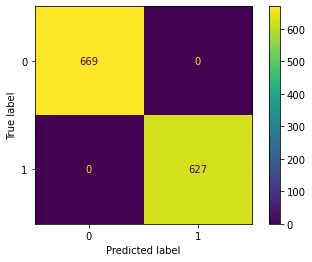

In [157]:
ConfusionMatrixDisplay.from_predictions(y_train, y_preds);

In [159]:
# USE THIS NOT predictions on the testing data like below!!
cross_val_score(tree_default, X_train_ohe_df, y_train)

array([0.83846154, 0.85714286, 0.82239382, 0.76061776, 0.82625483])

In [124]:
cross_val_score(tree_default, X_train_ohe_df, y_train).mean()

0.820974160974161

In [160]:
# Precision CV Score
cross_val_score(tree_default, X_train_ohe_df, y_train, scoring='precision')

array([0.83333333, 0.86178862, 0.80152672, 0.74045802, 0.80769231])

In [161]:
# Avg Precision CV Score
cross_val_score(tree_default, X_train_ohe_df, y_train, scoring='precision').mean()

0.8089597983472494

#### Save the introduction of TESTING DATA for AFTER the Grid Search!

#### Making Predictions on Testing Data:

In [143]:
#y_preds_te = tree_default.predict(X_test_ohe_df)
#y_preds_te

In [144]:
#accuracy_score(y_test, y_preds_te)

In [142]:
#confusion_matrix(y_test, y_preds_te)

#### Clearly the model is OVER-fit to the Training data, as evidenced by the major discrepency between the accuracy score of the training predicitons and the accuracy score of the testing predictions.

In [129]:
tree_default.feature_importances_

array([1.00425357e-02, 4.01967008e-02, 5.74506770e-02, 0.00000000e+00,
       2.47173171e-03, 9.90201108e-03, 3.10532376e-03, 2.43068023e-03,
       1.08892428e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.28579036e-03, 3.86208080e-03, 1.66255269e-02, 0.00000000e+00,
       1.65517749e-03, 2.05977643e-03, 2.44456983e-03, 2.74041187e-03,
       2.33837312e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.50136507e-03, 0.00000000e+00, 5.24219498e-03, 2.29014616e-03,
       0.00000000e+00, 0.00000000e+00, 4.36723572e-03, 8.37825733e-03,
       4.69517663e-03, 2.12598353e-03, 9.39015725e-04, 0.00000000e+00,
       3.83129610e-03, 7.72034976e-04, 2.32532252e-03, 2.34977127e-03,
       1.50470681e-03, 2.80878604e-03, 2.21716798e-03, 2.14195805e-03,
       6.02374457e-03, 6.32804780e-03, 8.91024205e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.92563337e-03, 2.73119633e-03, 9.68389005e-04, 3.74071857e-03,
      

In [130]:
tree_default.feature_names_in_

array(['2021 > Grade_10th', '2021 > Grade_11th', '2021 > Grade_12th',
       '2021 > Grade_6th', '2021 > Grade_7th', '2021 > Grade_8th',
       '2021 > Grade_9th', 'Gender_Female', 'Gender_Male',
       'Lead source_Advertisement', 'Lead source_Camp Advisory Service',
       'Lead source_Catalog', 'Lead source_Competitor',
       'Lead source_Family', 'Lead source_Friend',
       'Lead source_Google Ad', 'Lead source_Home Presentation',
       "Lead source_I'm a Moondance Alumni",
       "Lead source_I'm a sibling of a Moondance Alumni",
       'Lead source_No Source', 'Lead source_School Auction',
       'Lead source_Social Media',
       'Lead source_Summer Opportunities Fair', 'Lead source_Teacher',
       'Lead source_Web Search', 'Lead source_Website',
       'Lead source_Word of Mouth',
       '2021 > trip + section names (all)_Belize+Costa Rica 1',
       '2021 > trip + section names (all)_Belize+Costa Rica 1B',
       '2021 > trip + section names (all)_Belize+Costa Rica 1B, Can

In [132]:
for importance, feature in zip(tree_default.feature_importances_, tree_default.feature_names_in_):
    print(f'{feature}: {importance}')

2021 > Grade_10th: 0.01004253568311401
2021 > Grade_11th: 0.04019670082113769
2021 > Grade_12th: 0.05745067700888289
2021 > Grade_6th: 0.0
2021 > Grade_7th: 0.002471731714120196
2021 > Grade_8th: 0.009902011076799068
2021 > Grade_9th: 0.0031053237616968077
Gender_Female: 0.00243068022586121
Gender_Male: 0.010889242827710019
Lead source_Advertisement: 0.0
Lead source_Camp Advisory Service: 0.0
Lead source_Catalog: 0.0
Lead source_Competitor: 0.007285790357002877
Lead source_Family: 0.0038620808033128073
Lead source_Friend: 0.016625526939428283
Lead source_Google Ad: 0.0
Lead source_Home Presentation: 0.00165517748713406
Lead source_I'm a Moondance Alumni: 0.002059776428433497
Lead source_I'm a sibling of a Moondance Alumni: 0.002444569827151845
Lead source_No Source: 0.0027404118735362237
Lead source_School Auction: 0.0023383731195862367
Lead source_Social Media: 0.0
Lead source_Summer Opportunities Fair: 0.0
Lead source_Teacher: 0.0
Lead source_Web Search: 0.004501365072869299
Lead sou

In [133]:
pd.DataFrame(dict(zip(tree_default.feature_names_in_, tree_default.feature_importances_)), 
             index=[0]).T.sort_values(by=0, ascending=False).head(10)

,0
Years at camp,0.441414
2021 > Grade_12th,0.057451
2021 > Grade_11th,0.040197
2021 ^^Interested in Another Trip?_Yes,0.029822
2021 ^^^^Leader Rating of Student,0.026413
2021 ^Expectations_Met expectations,0.019704
2021 > Enrolled sibling count,0.017314
Lead source_Friend,0.016626
rating,0.012055
2021 ^^Interested in Another Trip?_Not Sure,0.011962


#### Addressing the model OVER-fitting via tuning 'max_depth' parameter ONLY!:

In [169]:
tree_2 = DecisionTreeClassifier(random_state=23, max_depth=20)
tree_2.fit(X_train_ohe_df, y_train)

print('Training Accuracy:', tree_2.score(X_train_ohe_df, y_train))
print('Training Precision:', precision_score(y_train, tree_2.predict(X_train_ohe_df)))
print('---------------------------------')
print('CV Avg Accuracy:', cross_val_score(tree_2, X_train_ohe_df, y_train).mean())
print('CV Avg Precision:', cross_val_score(tree_2, X_train_ohe_df, y_train, scoring='precision').mean())

Training Accuracy: 0.9729938271604939
Training Precision: 0.9539877300613497
---------------------------------
CV Avg Accuracy: 0.8310098010098012
CV Avg Precision: 0.8118761260363611


In [170]:
tree_3 = DecisionTreeClassifier(random_state=23, max_depth=15)
tree_3.fit(X_train_ohe_df, y_train)

print('Training Accuracy:', tree_3.score(X_train_ohe_df, y_train))
print('Training Precision:', precision_score(y_train, tree_3.predict(X_train_ohe_df)))
print('---------------------------------')
print('CV Avg Accuracy:', cross_val_score(tree_3, X_train_ohe_df, y_train).mean())
print('CV Avg Precision:', cross_val_score(tree_3, X_train_ohe_df, y_train, scoring='precision').mean())

Training Accuracy: 0.9452160493827161
Training Precision: 0.9250764525993884
---------------------------------
CV Avg Accuracy: 0.8271577071577072
CV Avg Precision: 0.7994518811403045


In [171]:
tree_4 = DecisionTreeClassifier(random_state=23, max_depth=5)
tree_4.fit(X_train_ohe_df, y_train)

print('Training Accuracy:', tree_4.score(X_train_ohe_df, y_train))
print('Training Precision:', precision_score(y_train, tree_4.predict(X_train_ohe_df)))
print('---------------------------------')
print('CV Avg Accuracy:', cross_val_score(tree_4, X_train_ohe_df, y_train).mean())
print('CV Avg Precision:', cross_val_score(tree_4, X_train_ohe_df, y_train, scoring='precision').mean())

Training Accuracy: 0.8449074074074074
Training Precision: 0.7886178861788617
---------------------------------
CV Avg Accuracy: 0.8325660825660826
CV Avg Precision: 0.7821291596875511


### Grid Searching for DecisionTree Classifier:

In [ ]:
tree_default()

In [172]:
from sklearn.model_selection import GridSearchCV

In [186]:
params = {'max_depth': [None, 5, 10, 20, 25], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid = GridSearchCV(estimator = tree_default, param_grid=params, cv=5)
grid.fit(X_train_ohe_df, y_train);

In [185]:
print(grid.best_score_)
print(grid.best_estimator_)

0.837962577962578
DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=23)


In [184]:
grid_precision = GridSearchCV(estimator = tree_default, param_grid=params, cv=5, scoring=('precision'))
grid_precision.fit(X_train_ohe_df, y_train);

In [183]:
print(grid_precision.best_score_)
print(grid_precision.best_estimator_)

0.8199834769457646
DecisionTreeClassifier(max_depth=25, min_samples_leaf=3, random_state=23)


### Introducing RandomForestClassifier:

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
randfor_default = RandomForestClassifier(random_state=23)

In [139]:
randfor_default.fit(X_train_ohe_df, y_train)

RandomForestClassifier(random_state=23)

In [140]:
cross_val_score(randfor_default, X_train_ohe_df, y_train)

array([0.83846154, 0.87258687, 0.82625483, 0.81853282, 0.87644788])

In [141]:
cross_val_score(randfor_default, X_train_ohe_df, y_train).mean()

0.8464567864567865

In [201]:
randfor_default.score(X_train_ohe_df, y_train)

1.0

In [203]:
precision_score(y_train, randfor_default.predict(X_train_ohe_df))

1.0

In [200]:
cross_val_score(randfor_default, X_train_ohe_df, y_train, scoring='precision').mean()

0.8158549757758878

In [148]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train_ohe_df.columns, randfor_default.feature_importances_)
}
feat_import

{'2021 > Grade_10th': 0.011803087042548132,
 '2021 > Grade_11th': 0.027825430700785594,
 '2021 > Grade_12th': 0.030186885389534557,
 '2021 > Grade_6th': 0.0026513297125856056,
 '2021 > Grade_7th': 0.00732503982971738,
 '2021 > Grade_8th': 0.014936629496442984,
 '2021 > Grade_9th': 0.011151512699611654,
 'Gender_Female': 0.013383712125109417,
 'Gender_Male': 0.011386913927559122,
 'Lead source_Advertisement': 0.0010753007594026406,
 'Lead source_Camp Advisory Service': 0.0007201071365626561,
 'Lead source_Catalog': 0.0010201778305114055,
 'Lead source_Competitor': 0.0034014880272890714,
 'Lead source_Family': 0.007753045940644925,
 'Lead source_Friend': 0.014144901040673867,
 'Lead source_Google Ad': 0.0003118021953804402,
 'Lead source_Home Presentation': 0.0011149444535527126,
 "Lead source_I'm a Moondance Alumni": 0.0077673367772737355,
 "Lead source_I'm a sibling of a Moondance Alumni": 0.003782977704631828,
 'Lead source_No Source': 0.001169101632237379,
 'Lead source_School Auctio

In [149]:
pd.DataFrame(dict(zip(randfor_default.feature_names_in_, randfor_default.feature_importances_)), 
             index=[0]).T.sort_values(by=0, ascending=False).head(10)

,0
Years at camp,0.325768
2021 ^^^^Leader Rating of Student,0.038026
2021 ^^Interested in Another Trip?_Yes,0.037574
2021 > Grade_12th,0.030187
2021 > Grade_11th,0.027825
rating,0.026823
2021 ^^Interested in Another Trip?_Not Sure,0.025712
2021 ^^Interested in Another Trip?_No,0.022055
2021 > Enrolled sibling count,0.020984
2021 > Grade_8th,0.014937


In [151]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### Grid Searching for Random Forest Classifier:

In [187]:
rf_params = {'n_estimators': [10, 50, 100, 150, 200], 'criterion': ['gini', 'entropy'], 
             'max_depth': [None, 5, 10, 20, 25], 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [204]:
rf_grid = GridSearchCV(estimator=randfor_default, param_grid=rf_params, cv=5)
rf_grid.fit(X_train_ohe_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [205]:
print(rf_grid.best_score_)
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)

0.8472230472230473
RandomForestClassifier(n_estimators=150, random_state=23)
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150}


In [197]:
rf_grid_precision = GridSearchCV(estimator=randfor_default, param_grid=rf_params, cv=5, scoring='precision')
rf_grid_precision.fit(X_train_ohe_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='precision')

In [198]:
print(rf_grid_precision.best_score_)
print(rf_grid_precision.best_estimator_)
print(rf_grid_precision.best_params_)

0.8288300300267271
RandomForestClassifier(n_estimators=10, random_state=23)


In [210]:
rf_params_new = {'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [None, 40, 45, 50, 55, 60], 
                 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [211]:
rf_grid_new =GridSearchCV(estimator=randfor_default, param_grid=rf_params_new, cv=5)
rf_grid_new.fit(X_train_ohe_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [None, 40, 45, 50, 55, 60],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [212]:
print(rf_grid_new.best_score_)
print(rf_grid_new.best_estimator_)
print(rf_grid_new.best_params_)

0.8503088803088803
RandomForestClassifier(max_depth=40, n_estimators=50, random_state=23)
{'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 50}


In [213]:
rf_grid_new.best_estimator_.score(X_train_ohe_df, y_train)

0.9992283950617284